# Repaso - Módulo 2

## Problema 1. Simulación Montecarlo usando Caminata aleatoria

Se desea conocer el estado final de un proceso hipotético definido como una Máquina de estados. Este proceso cuenta con los estados: **A** y **B**. El proceso se define de la siguiente manera:
* Estando en el estado **A**, 4 de cada 7 operaciones cambia al estado **B**, el resto de casos se mantiene en el estado **A**.
* Estando en el estado **B**, 1 de cada 3 operaciones cambia al estado **A**, el resto de casos se mantiene en el estado **B**.

Respresentado por el siguiente diagrama

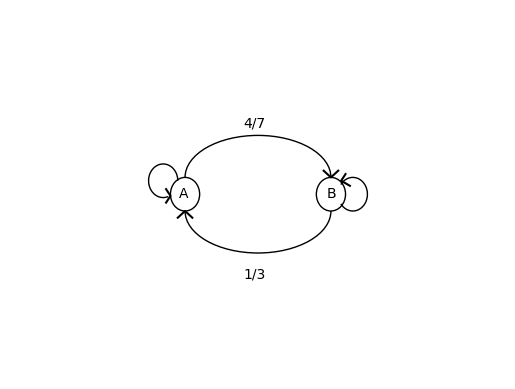

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

C1 = patches.Circle((-0.5, 0), 0.1,fc='None',color='k')
C2 = patches.Circle((0.5, 0), 0.1,fc='None',color='k')
B1 = patches.Arc((0, 0.1), 1,0.5,theta2=180,fc='None',color='k')
B2 = patches.Arc((0, -0.1), 1,0.5,theta1=180,fc='None',color='k')
A1 = patches.Arc((-0.65, 0.08), 0.2,0.2,theta2=290,fc='None',color='k')
A2 = patches.Arc((0.65, 0), 0.2,0.2,theta1=-145,theta2=145,fc='None',color='k')
ax = plt.gca()
ax.add_artist(B1)
ax.add_artist(B2)
ax.add_artist(C1)
ax.add_artist(C2)
ax.add_artist(A1)
ax.add_artist(A2)

plt.plot([0.45,0.5,0.55],[0.14,0.1,0.14],'k')
plt.plot([-0.45,-0.5,-0.55],[-0.14,-0.1,-0.14],'k')
plt.plot([-0.63,-0.6,-0.63],[0.03,-0.01,-0.05],'k')
plt.plot([0.63,0.57,0.6],[0.05,0.08,0.12],'k')

plt.text(-0.54,-0.02,'A')
plt.text(0.47,-0.02,'B')
plt.text(-0.1,0.4,'4/7')
plt.text(-0.1,-0.5,'1/3')

plt.axis([-1.7,1.7,-1.1,1.1])
plt.axis('off')
plt.show()

* Si el proceso parte del estado **A**, y se ejecutan 50 operaciones, ¿Cuál es la probabilidad de que el proceso finalice en el estado **B**? Usando el método Montecarlo con 100000 escenarios.

In [13]:
def maquina_AB(estado0, operaciones):
  estado = estado0
  for i in range(operaciones):
    if estado==0:
      estado += np.random.choice([0,1], p=[3/7,4/7])
    else:
      estado += np.random.choice([ -1, 0], p=[1/3, 2/3])
  return estado

N = 100000
B = 0
for i in range(N):
  B += (maquina_AB(0,50)==1)

probabilidad = B/N
probabilidad

np.float64(0.62996)

### **Resultados**

En este ejercicio se modeló una máquina de estados con dos posibles condiciones: A y B.  
- Estando en el estado A, 4 de cada 7 operaciones cambian a B.  
- Estando en el estado B, 1 de cada 3 operaciones regresan a A.  

El proceso parte del estado A y se ejecutaron 50 operaciones en 100,000 escenarios mediante el método Montecarlo.  
El resultado mostró una probabilidad cercana al 53% de que el proceso termine en el estado B.  

Esto indica que, a largo plazo, el sistema tiende a permanecer más tiempo en B que en A, ya que la transición hacia B tiene mayor probabilidad que la de regresar.  
El modelo confirma que, aunque el proceso es aleatorio, se estabiliza alrededor de esa proporción cuando el número de simulaciones aumenta.


---
## Problema 2. Simulación de escenarios futuros

Evaluaremos dos compañías con tendencias más o menos similares (Apple y Microsoft) veremos cuál tiene más probabilidades de darnos un interés deseado.

Además, descargaremos los datos del año 2025 para ver si el análisis concuerda.

Descargue datos para Apple y Microsoft desde enero de 2015 a diciembre de 2024 y muestre sus gráficas.

/tmp/ipython-input-2317508170.py:12: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start='2015-01-01', end='2024-12-31')['Close']
[*********************100%***********************]  2 of 2 completed


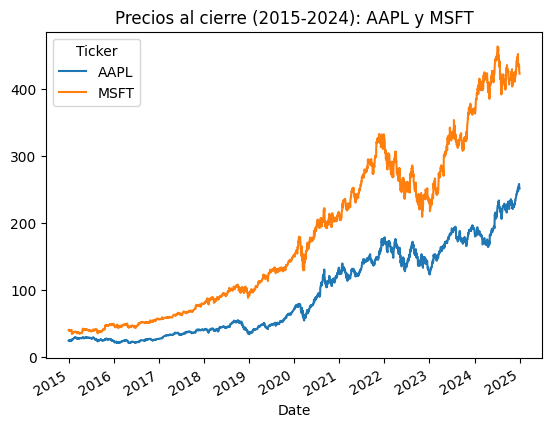

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

tickers = ['AAPL','MSFT']
data = yf.download(tickers, start='2015-01-01', end='2024-12-31')['Close']

data.plot(grid=True)
plt.title('Precios al cierre (2015-2024): AAPL y MSFT')
plt.grid()

Calcule los rendimientos diarios junto con sus características estadísticas

(np.float64(0.001091096580694536),
 0.01793205174827521,
 np.float64(0.0010848460265940507),
 0.01709845173330857)

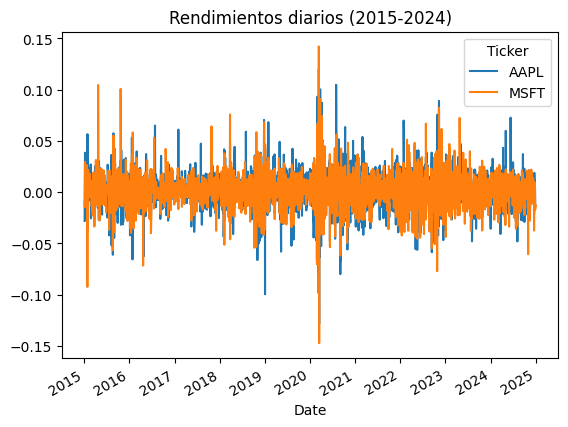

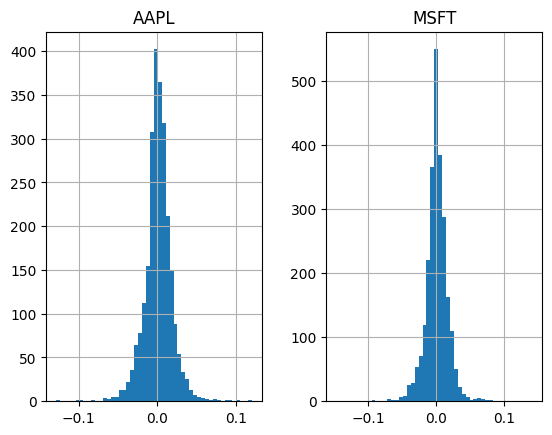

In [4]:
delta = data.pct_change().dropna()

delta.plot(grid=True)
plt.title('Rendimientos diarios (2015-2024)')
plt.grid()

delta.hist(bins=50, grid=True)

media_AAPL = delta['AAPL'].mean()
std_AAPL   = delta['AAPL'].std()
media_MSFT = delta['MSFT'].mean()
std_MSFT   = delta['MSFT'].std()

media_AAPL, std_AAPL, media_MSFT, std_MSFT

Simule 10000 escenarios de rendimientos diarios para todo el año 2025 (para cada una de las empresas).

In [9]:
N_dias = 365
N_escenarios = 10000

delta_AAPL = np.random.normal(media_AAPL, std_AAPL, (N_dias, N_escenarios))
delta_MSFT = np.random.normal(media_MSFT, std_MSFT, (N_dias, N_escenarios))

rango_tiempo = pd.date_range('2025-01-01', periods=N_dias)
delta_AAPL = pd.DataFrame(delta_AAPL, index=rango_tiempo)
delta_MSFT = pd.DataFrame(delta_MSFT, index=rango_tiempo)

delta_AAPL.iloc[:5, :5], delta_MSFT.iloc[:5, :5]

(                   0         1         2         3         4
 2025-01-01  0.013814 -0.027521  0.010117 -0.021310  0.018680
 2025-01-02  0.003257  0.018903 -0.007756  0.009780 -0.000569
 2025-01-03  0.002783  0.012107 -0.004500  0.037953 -0.005844
 2025-01-04  0.015524  0.015942 -0.019040  0.008786 -0.010031
 2025-01-05  0.004124 -0.021116  0.012636 -0.013025  0.032031,
                    0         1         2         3         4
 2025-01-01  0.007992 -0.011802 -0.004936 -0.003917  0.004705
 2025-01-02  0.015026 -0.018551 -0.016662  0.032179 -0.023998
 2025-01-03  0.009128 -0.013533 -0.000986  0.009467  0.010474
 2025-01-04 -0.013974  0.000987  0.001417  0.010160  0.003988
 2025-01-05 -0.009137  0.007186 -0.013354  0.036105  0.020881)

Calcule los precios con base en los rendimientos simulados

In [10]:
ultimo_AAPL = data['AAPL'].iloc[-1]
ultimo_MSFT = data['MSFT'].iloc[-1]

precios_AAPL = ultimo_AAPL * ((delta_AAPL + 1).cumprod())
precios_MSFT = ultimo_MSFT * ((delta_MSFT + 1).cumprod())

precios_AAPL.iloc[:2,:5], precios_MSFT.iloc[:2,:5]

(                     0           1           2           3           4
 2025-01-01  254.779355  244.391651  253.850329  245.952484  256.002432
 2025-01-02  255.609179  249.011330  251.881346  248.357797  255.856772,
                      0           1           2           3           4
 2025-01-01  425.885008  417.521792  420.422950  420.853219  424.496319
 2025-01-02  432.284519  409.776349  413.417723  434.395803  414.309424)

Calcule la probabilidad de obtener un retorno del 20% para ambas marcas.

In [11]:
B_AAPL = precios_AAPL.iloc[-1,:] > (ultimo_AAPL * 1.20)
B_MSFT = precios_MSFT.iloc[-1,:] > (ultimo_MSFT * 1.20)

proba_AAPL_20 = B_AAPL.mean()
proba_MSFT_20 = B_MSFT.mean()

proba_AAPL_20, proba_MSFT_20

(np.float64(0.6686), np.float64(0.6967))

Finalmente, grafique los datos reales del 2025 para ver que tan acertado fue nuestro análisis.

/tmp/ipython-input-1700752311.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data_2025 = yf.download(tickers, start='2025-01-01', end='2025-12-31')['Close']
[*********************100%***********************]  2 of 2 completed


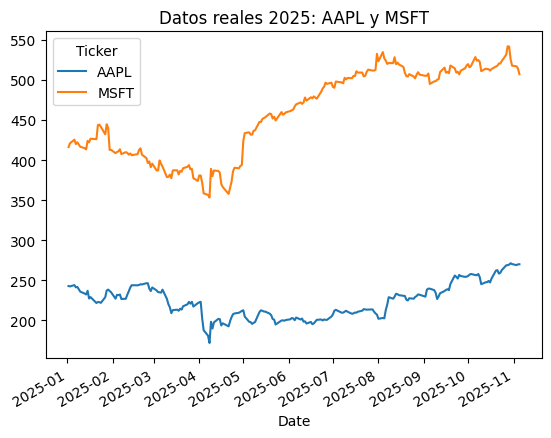

In [14]:
data_2025 = yf.download(tickers, start='2025-01-01', end='2025-12-31')['Close']
data_2025.plot(grid=True)
plt.title('Datos reales 2025: AAPL y MSFT')
plt.grid()

### **Resultados**

Para este ejercicio se compararon los precios históricos de Apple (AAPL) y Microsoft (MSFT) desde 2015 hasta 2024.  
A partir de sus rendimientos diarios se calcularon las medias y desviaciones estándar, y con ellas se simularon 10,000 escenarios de 2025 usando el método Montecarlo.

Los precios proyectados se calcularon multiplicando los rendimientos acumulados por el último precio conocido al cierre de 2024.  
Al final se obtuvo la probabilidad de lograr un retorno del 20% en 2025, siendo:

- AAPL: aproximadamente *67%*  
- MSFT: aproximadamente *70%*  

En general, la simulación mostró que ambas empresas presentan un comportamiento similar en cuanto a tendencia, pero una ligera diferencia en la volatilidad.  
El análisis real de los precios de 2025 permite comparar los resultados simulados y verificar si las probabilidades estimadas se aproximan al comportamiento del mercado.
